In [1]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# LabelEncoder can be used to normalize labels.
from sklearn.preprocessing import LabelEncoder
plt.figure(figsize=(20,10))

#cross validation
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

<Figure size 1440x720 with 0 Axes>

# Y=credit limit

<b> In this first example I chose to predict the credit limit.  I reduced the features and reached a 64% accurracy prediction rate.  

In [2]:
#This is a data set that I have already removed all the extreme outliers.
credit= pd.read_csv('clean_data.csv')
credit.head()

,Unnamed: 0,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,limit,sex,education,marriage,age
0,0,2,2,0,0,0,0,3913,3102,689,...,0,0,0,0,default,20000,female,university,1,24
1,1,0,2,0,0,0,2,2682,1725,2682,...,1000,1000,0,2000,default,120000,female,university,2,26
2,2,0,0,0,0,0,0,29239,14027,13559,...,1000,1000,1000,5000,not default,90000,female,university,2,34
3,3,0,0,0,0,0,0,46990,48233,49291,...,1200,1100,1069,1000,not default,50000,female,university,1,37
4,4,0,0,0,0,0,0,8617,5670,35835,...,10000,9000,689,679,not default,50000,male,university,1,57


In [3]:
#Binning the ages into groups by decades. Age 60+ represented 1% of total customers so I have biggest group of 50+
bins = [20,29,39,49,80]

credit['age_groups'] = pd.cut(credit['age'], bins=bins, labels =[20, 30,40,50]).astype('int64')

In [4]:
#How many total creditors are in each age group.  
credit['age_groups'].value_counts(sort=False)

50     2668
20     9595
40     6434
30    11189
Name: age_groups, dtype: int64

In [5]:
#I binned the credit limits. After a several attempts this gave me a 65% prediction rate
bins = [9999, 160000 ,300000,600000]
credit['limit_groups'] = pd.cut(credit['limit'],bins=bins, labels=[10,160,300]).astype('int64')
credit['limit_groups'].value_counts(sort=True)

10     17079
160     8331
300     4476
Name: limit_groups, dtype: int64

In [6]:
credit_binned = credit
credit_binned.head()

,Unnamed: 0,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,PAY_AMT5,PAY_AMT6,default,limit,sex,education,marriage,age,age_groups,limit_groups
0,0,2,2,0,0,0,0,3913,3102,689,...,0,0,default,20000,female,university,1,24,20,10
1,1,0,2,0,0,0,2,2682,1725,2682,...,0,2000,default,120000,female,university,2,26,20,10
2,2,0,0,0,0,0,0,29239,14027,13559,...,1000,5000,not default,90000,female,university,2,34,30,10
3,3,0,0,0,0,0,0,46990,48233,49291,...,1069,1000,not default,50000,female,university,1,37,30,10
4,4,0,0,0,0,0,0,8617,5670,35835,...,689,679,not default,50000,male,university,1,57,50,10


In [7]:
credit_binned.dtypes

Unnamed: 0       int64
PAY_0            int64
PAY_2            int64
PAY_3            int64
PAY_4            int64
PAY_5            int64
PAY_6            int64
BILL_AMT1        int64
BILL_AMT2        int64
BILL_AMT3        int64
BILL_AMT4        int64
BILL_AMT5        int64
BILL_AMT6        int64
PAY_AMT1         int64
PAY_AMT2         int64
PAY_AMT3         int64
PAY_AMT4         int64
PAY_AMT5         int64
PAY_AMT6         int64
default         object
limit            int64
sex             object
education       object
marriage         int64
age              int64
age_groups       int64
limit_groups     int64
dtype: object

In [8]:
#Encode as needed
le = LabelEncoder()
le.fit(credit_binned['sex'])
credit_binned['sex']=le.transform(credit_binned['sex'])
credit_binned['sex'].value_counts()

0    18047
1    11839
Name: sex, dtype: int64

In [9]:
le = LabelEncoder()
le.fit(credit_binned['default'])
credit_binned['default'] = le.transform(credit_binned['default'])
credit_binned['default'].value_counts()

1    23262
0     6624
Name: default, dtype: int64

In [10]:
credit_binned.dtypes

Unnamed: 0       int64
PAY_0            int64
PAY_2            int64
PAY_3            int64
PAY_4            int64
PAY_5            int64
PAY_6            int64
BILL_AMT1        int64
BILL_AMT2        int64
BILL_AMT3        int64
BILL_AMT4        int64
BILL_AMT5        int64
BILL_AMT6        int64
PAY_AMT1         int64
PAY_AMT2         int64
PAY_AMT3         int64
PAY_AMT4         int64
PAY_AMT5         int64
PAY_AMT6         int64
default          int32
limit            int64
sex              int32
education       object
marriage         int64
age              int64
age_groups       int64
limit_groups     int64
dtype: object

In [11]:
credit_binned["education"].replace({"high school": 1, "university": 2, "graduate school": 3, 'other':0}, inplace=True)

In [12]:
credit_binned.dtypes

Unnamed: 0      int64
PAY_0           int64
PAY_2           int64
PAY_3           int64
PAY_4           int64
PAY_5           int64
PAY_6           int64
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
default         int32
limit           int64
sex             int32
education       int64
marriage        int64
age             int64
age_groups      int64
limit_groups    int64
dtype: object

In [13]:
credit_binned = credit_binned.drop(['Unnamed: 0','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis=1)
credit_binned = credit_binned.drop(['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis=1)
credit_binned = credit_binned.drop(['PAY_AMT2','PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','sex', 'marriage', 'age_groups'], axis=1)
credit_binned.head()

,BILL_AMT1,PAY_AMT1,default,limit,education,age,limit_groups
0,3913,0,0,20000,2,24,10
1,2682,0,0,120000,2,26,10
2,29239,1518,1,90000,2,34,10
3,46990,2000,1,50000,2,37,10
4,8617,2000,1,50000,2,57,10


In [14]:
#after feature selection

In [15]:
credit_binned.corr()

,BILL_AMT1,PAY_AMT1,default,limit,education,age,limit_groups
BILL_AMT1,1.000000,0.137388,0.018455,0.277678,-0.018223,0.054285,0.235253
PAY_AMT1,0.137388,1.000000,0.072660,0.192374,0.040463,0.026308,0.179044
default,0.018455,0.072660,1.000000,0.153577,0.033639,-0.014150,0.137800
limit,0.277678,0.192374,0.153577,1.000000,0.232302,0.143368,0.926762
education,-0.018223,0.040463,0.033639,0.232302,1.000000,-0.183014,0.218291
age,0.054285,0.026308,-0.014150,0.143368,-0.183014,1.000000,0.132145
limit_groups,0.235253,0.179044,0.137800,0.926762,0.218291,0.132145,1.000000


In [16]:
X = credit_binned.drop(['limit','limit_groups','age', 'default'], axis=1)
y = credit_binned['limit_groups']

In [17]:
X.head()

,BILL_AMT1,PAY_AMT1
0,3913,0
1,2682,0
2,29239,1518
3,46990,2000
4,8617,2000


In [18]:
algos_Class = []
algos_Class.append(('Random Forest Classifier',RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier',DecisionTreeClassifier()))

In [19]:
#classificaiton
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv = 4, scoring = 'accuracy')
    names.append(name)
    results.append(result)

In [20]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.5874325049004616
Decision Tree Classifier 0.5529346950965575


In [21]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                test_size = .2, random_state =123)

In [22]:
#Modeling (Classification)
algo = DecisionTreeClassifier(max_depth = 5, random_state = 123)
model = algo.fit(X_train, y_train)
print(model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [23]:
#Predictions
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          10       0.70      0.88      0.78      3524
         160       0.48      0.37      0.42      1590
         300       0.49      0.19      0.28       864

    accuracy                           0.64      5978
   macro avg       0.56      0.48      0.49      5978
weighted avg       0.61      0.64      0.61      5978



In [24]:
print("Accuracy for Decison Tree "), accuracy_score(y_test,predictions)

Accuracy for Decison Tree 


(None, 0.6448645031783206)

In [25]:
import pydot
import matplotlib.image as mping
import io
from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import tree
import matplotlib as mpl
import graphviz
import pydotplus

C:\conda\envs\sherri\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


In [26]:
labels=[ '(10-50]','(50-100]','(300-600]']

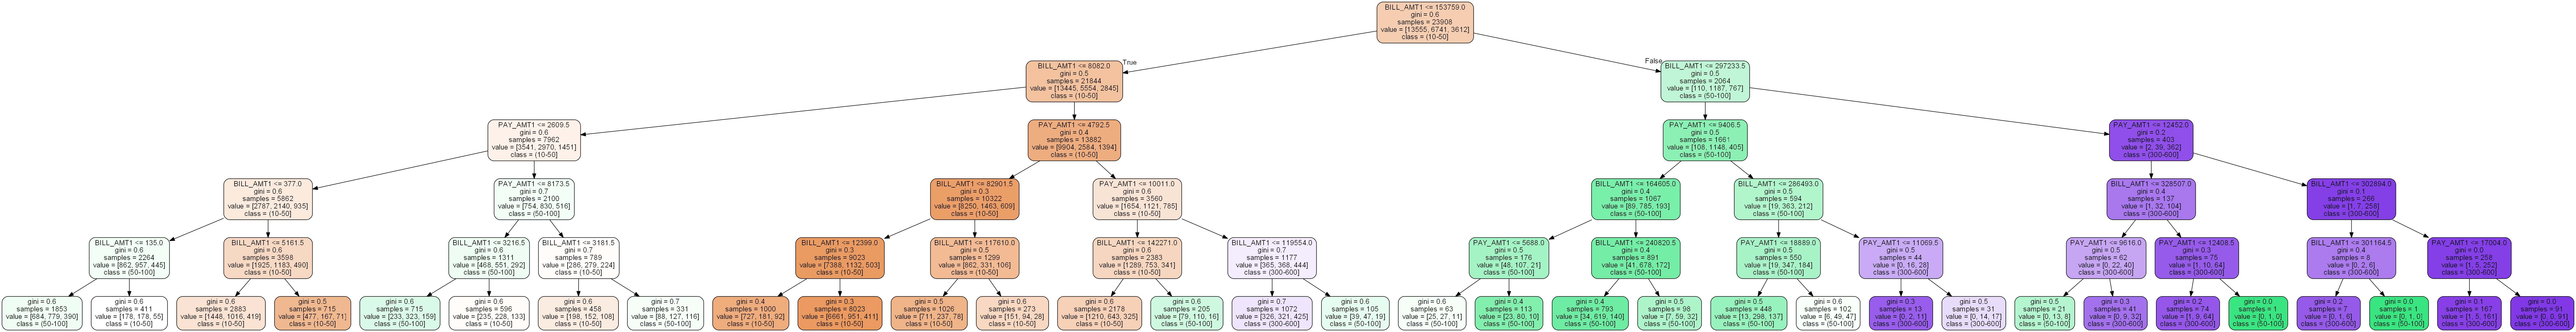

In [27]:

dot_data = StringIO()
export_graphviz(model, out_file = dot_data, filled = True, rounded=True,
                feature_names = X.columns, class_names=labels, 
                precision=1,label='all')
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.set_size('"100,100!"')
Image(graph.create_png())

In [28]:
#Modeling (Classification) Using Random Forest
algo = RandomForestClassifier(n_estimators=250, max_depth=15,random_state = 123)
model = algo.fit(X_train, y_train)
print(model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


In [29]:
#Predictions
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          10       0.72      0.85      0.78      3524
         160       0.47      0.43      0.45      1590
         300       0.48      0.22      0.30       864

    accuracy                           0.64      5978
   macro avg       0.56      0.50      0.51      5978
weighted avg       0.62      0.64      0.62      5978

